In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

import spacy 
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud
from collections import Counter
from nltk import word_tokenize, FreqDist
import re
import string

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import GRU, Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from time import time
import glob




Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [3]:
from imblearn.over_sampling import SMOTE, ADASYN

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
# Helper functions 
# Setting up a function to help visualize performance of deep learning models.

def deep_learning_visuals(model_history):

    #Store the fitted model history into a dictionary
    hist_dict = model_history.history
    
    # Putting the training and testing loss into the dictionary
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']

    # Putting the training and testing accuracies into the dictionary
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc'] 
    
    # Getting a range of epochs to use as the x-axis (essentially models over time)
    epochs = range(1, len(loss_values) + 1)
    #Create the figure
    fig, ax = plt.subplots(1, 2, figsize=[20,8])
    
    # Formatting plot for losses
    ax[0].plot(epochs, loss_values, 'red', label='Training Loss')
    ax[0].plot(epochs, val_loss_values, 'green', label='Validation Loss')
    ax[0].set_title('Training vs. Validation LOSS', fontsize=25)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('Loss', fontsize=16)
    ax[0].legend()
    
    # Formatting plot for accuracies
    ax[1].plot(epochs, acc_values, 'red', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_values, 'green', label='Validation Accuracy')
    ax[1].set_title('Training vs. Validation ACCURACY', fontsize=25)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('Accuracy', fontsize=16)
    
    plt.legend()
    plt.show()


In [5]:
# Shows confusion matrix and classification report for a model after it has been fitted
def results_summary(mymodel, model_name, X_test, y_test):
    model_preds = mymodel.predict(X_test)
    model_measures = mymodel.evaluate(X_test, y_test)
    
    accuracy = round(model_measures[1],4)
    loss = round(model_measures[0],4)
    
    class_report = classification_report(y_test.argmax(axis=1), model_preds.argmax(axis=1), target_names=['Flop', 'Average', 'Hit'])
    
    statement = str("MODEL {} \nAccuracy Score: {} \nLoss: {}".format(model_name, accuracy, loss))
    plot_confusion_matrix(y_test, model_preds, normalize=False)
    plot_confusion_matrix(y_test, model_preds, normalize=True)
    
    print(str(statement + "\n\n" + "CLASSIFICATION REPORT \n" + class_report))



In [6]:
#Plots a confusion matrix of a given model

def plot_confusion_matrix(y_test, model_test, normalize=False):
    cm = confusion_matrix(y_test.argmax(axis=1), model_test.argmax(axis=1))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(4)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.figure(figsize=(6,6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia, origin='lower')
    classNames = ['Flop', 'Average', 'Hit']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    for i in range(3):
        for j in range(3):
            plt.text(j,i, cm[i][j])
    plt.show()

In [7]:
# Shows confusion matrix and classification report for a model after it has been fitted
def results_summary_binary(mymodel, model_name, X_test, y_test):
    model_preds = mymodel.predict(X_test)
    model_measures = mymodel.evaluate(X_test, y_test)
    
    accuracy = round(model_measures[1],4)
    loss = round(model_measures[0],4)
    
    class_report = classification_report(y_test.argmax(axis=1), model_preds.argmax(axis=1), target_names=['Non-Hit', 'Hit'])
    
    statement = str("MODEL {} \nAccuracy Score: {} \nLoss: {}".format(model_name, accuracy, loss))
    plot_confusion_matrix_binary(y_test, model_preds, normalize=False)
    plot_confusion_matrix_binary(y_test, model_preds, normalize=True)
    
    print(str(statement + "\n\n" + "CLASSIFICATION REPORT \n" + class_report))


In [8]:
#Plots a confusion matrix of a given model

def plot_confusion_matrix_binary(y_test, model_test, normalize=False):
    cm = confusion_matrix(y_test.argmax(axis=1), model_test.argmax(axis=1))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(4)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.figure(figsize=(6,6))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia, origin='lower')
    classNames = ['Non-Hit','Hit']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [9]:
NLP_model_df = pd.read_csv('About_text_df.csv')

In [10]:
# Had to re-type the cleaned text as string due to an issue with pandas csv reader occasionallly reading strings as booleans,
# which causes processing errors when trying to put it through NLTK
NLP_model_df['cleaned_text'] = NLP_model_df['cleaned_text'].astype(str)

In [11]:
NLP_model_df.head()

,Name,AboutText,BINARY_Hits,cleaned_text,text_length
0,Counter-Strike,Play the worlds number 1 online action game. E...,2.0,play worlds number 1 online action game engage...,48
1,Team Fortress Classic,One of the most popular online action games of...,2.0,one popular online action games time team fort...,57
2,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,2.0,enlist intense brand axis vs allied teamplay s...,65
3,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,2.0,enjoy fast paced multiplayer gaming deathmatch...,38
4,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,2.0,return black mesa research facility one milita...,49


In [12]:
NLP_model_df = NLP_model_df[['cleaned_text', 'BINARY_Hits']]

In [13]:
NLP_model_df.head()

,cleaned_text,BINARY_Hits
0,play worlds number 1 online action game engage...,2.0
1,one popular online action games time team fort...,2.0
2,enlist intense brand axis vs allied teamplay s...,2.0
3,enjoy fast paced multiplayer gaming deathmatch...,2.0
4,return black mesa research facility one milita...,2.0


In [14]:
NLP_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10619 entries, 0 to 10618
Data columns (total 2 columns):
cleaned_text    10619 non-null object
BINARY_Hits     10619 non-null float64
dtypes: float64(1), object(1)
memory usage: 166.0+ KB


In [15]:
NLP_model_df['BINARY_Hits'].value_counts()

1.0    5288
0.0    2749
2.0    2582
Name: BINARY_Hits, dtype: int64

In [16]:
# Establishing features and labels as X and y
X = NLP_model_df['cleaned_text']
y = NLP_model_df['BINARY_Hits']

In [17]:
#Instantiates a tokenizer object and sets it so the model only keeps the 20000 most used words
tokenizer = Tokenizer(num_words = 20000)
#Applies the tokenizer to our newly crated X feature dataframe
tokenizer.fit_on_texts(list(X))
#Converting our data to sequences
X = tokenizer.texts_to_sequences(X)
#Padding the sequences to equalize length
X = sequence.pad_sequences(X, maxlen=200)

In [18]:
X.shape

(10619, 200)

In [19]:
# Put this in to make sure keras reads target as categorical (hit, average, or flop)
from keras.utils import to_categorical
y_binary_cat = to_categorical(y)

In [54]:
#Train and test with test size at 10%
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_cat, test_size=0.1, random_state=42) 

In [21]:
X_train.shape

(9557, 200)

In [22]:
X_test.shape

(1062, 200)

# Modeling: Building a recurrent neural network(RNN)

I decided to use deep learning neural network models due to their ability to efficiently and accurately solve text classification problems.

Below, I build out the first iteration of my recurrent neural network. This section will consist of me trying different neural networks with different layers and parameters to optimize testing accuracy. The models can be broadly divided into two kinds of models:

1. Models using their own embedding layer for embedding words into vectors
2. Models using pre-trained algorithms to form vectors

**After I run through several iterations of these models with different parameters and layers, I will pick the best performing layer structures and parameters to create an optimal model.**

Before doing anything else, I'll need to set some parameters to build the  deep learning models with. 

## Model 1.1: Simple LSTM RNN

Below I explain the basics that each layer is accomplishing. This was my first model so I used other educational examples to set some of the parameters. As I move into other models below I will modify these parameters and tune them to my specific problem.

**Layer breakdown**

- Input layer: First layer of the neural network that takes input values (lists of words in this case) and passes them to the next layer
- Embedding layer: Words(already preprocessed through tokenization and sequencing) are projeted into a limited dimension vector space, thereby reducing the model size and eliminating the curse of dimensionality that comes with spare vectors. Its output is a list of coordinates for the words in my limited dimension vector space. Above, I've set it up so the size of the resulting embedding vector is 128, but this can be tuned.
- LSTM layer: Specialized layer which effectively deals with vanishing and exploding gradients. These layers effectively learn which information is important enough to remember and what can be forgotten in sequence models.
- Pooling layer: Downsamples output of prior layer but retains information from that layer
- Dropout layer: A method to reduce overfitting by downsampling and removing nodes from the previous layer. I use two in my initial model but will vary this in future variations.
- Dense layer: Classic "hidden layer", a linear operation is applied to every input and given a weight and an activation.
- Output layer: Last layer of the network puts the data into desired classes using an activation function- in this case softmax.

**Note** : Going forward I will only summarize the changes from the previous model

In [23]:
# Setting starter parameters to build models with 

# number of unique words to consider in the corpus
max_features = 20000 

# max number of words in a blurb (same as sequence length)
max_len = 200 

# dimension of the embedding variable 
embedding_dims = 128

In [24]:
# Building a basic LSTM model

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 50)           35800     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total para

In [27]:
model1_hist = lstm_model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 8601 samples, validate on 956 samples
Epoch 1/8
 - 21s - loss: 1.0492 - acc: 0.4969 - val_loss: 1.0337 - val_acc: 0.4969
Epoch 2/8
 - 20s - loss: 0.9917 - acc: 0.5189 - val_loss: 0.9478 - val_acc: 0.5345
Epoch 3/8
 - 20s - loss: 0.8453 - acc: 0.6016 - val_loss: 0.9391 - val_acc: 0.5356
Epoch 4/8
 - 20s - loss: 0.6532 - acc: 0.7076 - val_loss: 1.0684 - val_acc: 0.5366
Epoch 5/8
 - 20s - loss: 0.4658 - acc: 0.8171 - val_loss: 1.4124 - val_acc: 0.5052
Epoch 6/8
 - 20s - loss: 0.3124 - acc: 0.8885 - val_loss: 1.7900 - val_acc: 0.5167
Epoch 7/8
 - 20s - loss: 0.2040 - acc: 0.9328 - val_loss: 2.0031 - val_acc: 0.4906
Epoch 8/8
 - 20s - loss: 0.1563 - acc: 0.9493 - val_loss: 2.1930 - val_acc: 0.5084


## Model 1.1 Results

1062/1062 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 393us/step
Confusion matrix, without normalization


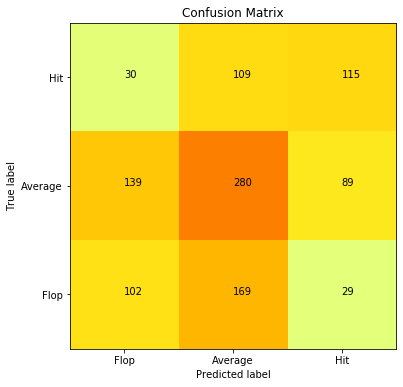

Normalized confusion matrix


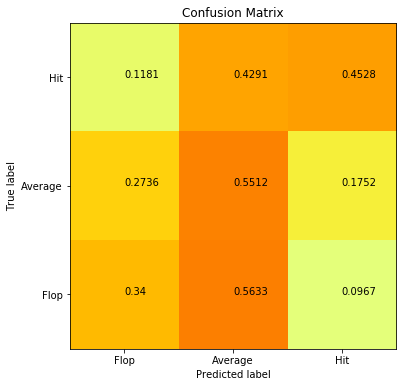

MODEL First Model 
Accuracy Score: 0.468 
Loss: 2.4497

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

        Flop       0.38      0.34      0.36       300
     Average       0.50      0.55      0.53       508
         Hit       0.49      0.45      0.47       254

    accuracy                           0.47      1062
   macro avg       0.46      0.45      0.45      1062
weighted avg       0.46      0.47      0.47      1062



In [28]:
results_summary(lstm_model, "First Model", X_test, y_test)

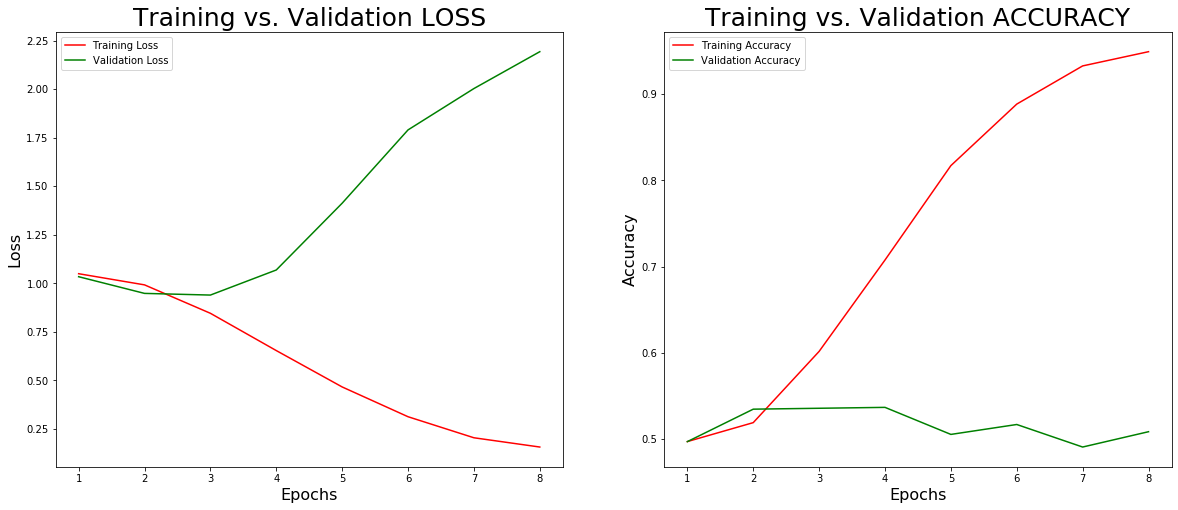

In [29]:
deep_learning_visuals(model1_hist)

# Model 1.2 - Iterating the self-trained model

**Changes from model 1.1**

- Here, instead of using an LSTM cell I use a GRU cell. There is still ambiguity in the data science community as to which cell is better, and as such I wanted to try a GRU in this iteration. 
- I decided to try a bidirectional sequence model. Typically in an RNN, the sequence of words is read forward to backward and predictions are made one word at a time. This means that the model doesn't know the 4th word of the blurb when it reads the 2nd. It only can make predictions using things which it has already read (in this case, only the 1st word of the blurb). Essentially, the RNN is unable to see the **future** and adjust its predictions using its knowledge of what comes next. A bidirectional RNN solves this problem by having half of the neurons start at the beginning of the data and work to the end, and the other half start at the end of the data and work to the beginning. This is especially applicable for Kickstarter blurbs because the context of all the words together gives each blurb its meaning.

In [50]:
model2 = Sequential()
model2.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))
model2.add(Bidirectional(GRU(30, return_sequences=True)))
model2.add(GlobalMaxPool1D())
model2.add(Dense(70, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(35, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='softmax'))

In [51]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200, 60)           28620     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 60)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 70)                4270      
_________________________________________________________________
dropout_8 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 35)                2485      
_________________________________________________________________
dropout_9 (Dropout)          (None, 35)                0         
__________

In [55]:
model2_hist = model2.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1, verbose=2)

Train on 8601 samples, validate on 956 samples
Epoch 1/8
 - 21s - loss: 1.0358 - acc: 0.4985 - val_loss: 0.9886 - val_acc: 0.5063
Epoch 2/8
 - 20s - loss: 0.9246 - acc: 0.5525 - val_loss: 0.9481 - val_acc: 0.5387
Epoch 3/8
 - 20s - loss: 0.6648 - acc: 0.7093 - val_loss: 0.9944 - val_acc: 0.5188
Epoch 4/8
 - 21s - loss: 0.3413 - acc: 0.8759 - val_loss: 1.3215 - val_acc: 0.5084
Epoch 5/8
 - 20s - loss: 0.1193 - acc: 0.9661 - val_loss: 1.8496 - val_acc: 0.5209
Epoch 6/8
 - 20s - loss: 0.0577 - acc: 0.9866 - val_loss: 2.1948 - val_acc: 0.4937
Epoch 7/8
 - 21s - loss: 0.0348 - acc: 0.9935 - val_loss: 2.3897 - val_acc: 0.4895
Epoch 8/8
 - 21s - loss: 0.0288 - acc: 0.9926 - val_loss: 2.3358 - val_acc: 0.5031


## Model 1.2 Results

1062/1062 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 481us/step
Confusion matrix, without normalization


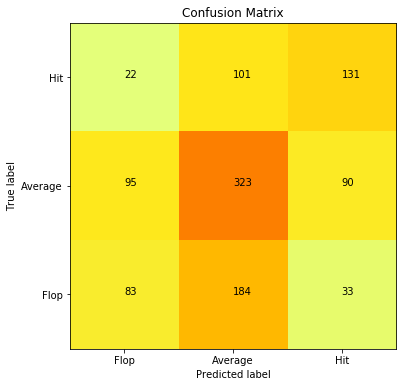

Normalized confusion matrix


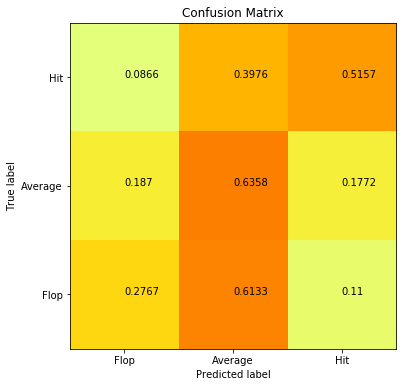

MODEL Second Model 
Accuracy Score: 0.5056 
Loss: 2.427

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

        Flop       0.41      0.28      0.33       300
     Average       0.53      0.64      0.58       508
         Hit       0.52      0.52      0.52       254

    accuracy                           0.51      1062
   macro avg       0.49      0.48      0.48      1062
weighted avg       0.49      0.51      0.49      1062



In [56]:
results_summary(model2, "Second Model", X_test, y_test)

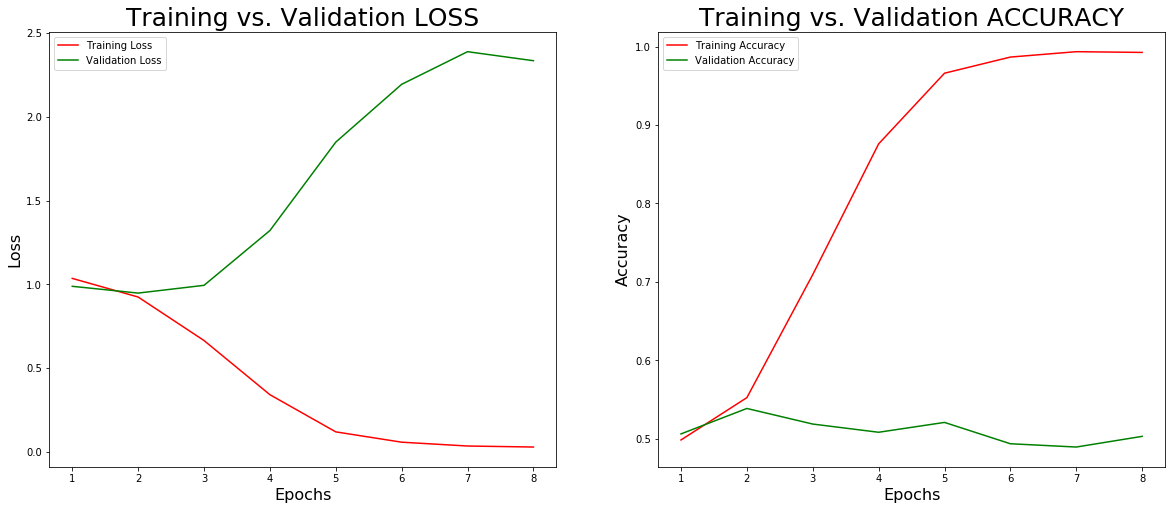

In [58]:
deep_learning_visuals(model2_hist)

**Still greatly overfitting this model**

# Model 1.3: Adding Regularization

I'm still optimistic about using bidirectional sequencing for this task, so I'll try adding regularization and changing a few other things....

- Added a lasso regularizer(L1) to hopefully reduce overfitting in the above models. 
- Dropped a dense and a dropout layer to see if having larger layers near the output layer improves accuracy


In [59]:
model3_regularize = Sequential()
model3_regularize.add(Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims))
model3_regularize.add(Bidirectional(GRU(30, return_sequences=True)))
model3_regularize.add(GlobalMaxPool1D())
model3_regularize.add(Dense(70, kernel_regularizer=regularizers.l1(0.007), activation='relu'))
model3_regularize.add(Dropout(0.5))
model3_regularize.add(Dense(3, activation='softmax'))

In [60]:
model3_regularize.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model3_regularize.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200, 60)           28620     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 60)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 70)                4270      
_________________________________________________________________
dropout_10 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 213       
Total params: 2,593,103
Trainable params: 2,593,103
Non-trainable params: 0
_________________________________________________________________


In [62]:
hist_model3_regularize = model3_regularize.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1, verbose=2)

Train on 8601 samples, validate on 956 samples
Epoch 1/8
 - 21s - loss: 1.9295 - acc: 0.4978 - val_loss: 1.0566 - val_acc: 0.4969
Epoch 2/8
 - 20s - loss: 1.0503 - acc: 0.5005 - val_loss: 1.0491 - val_acc: 0.4969
Epoch 3/8
 - 20s - loss: 1.0505 - acc: 0.5005 - val_loss: 1.0476 - val_acc: 0.4969
Epoch 4/8
 - 20s - loss: 1.0477 - acc: 0.5005 - val_loss: 1.0467 - val_acc: 0.4969
Epoch 5/8
 - 20s - loss: 1.0441 - acc: 0.5005 - val_loss: 1.0402 - val_acc: 0.4969
Epoch 6/8
 - 20s - loss: 1.0163 - acc: 0.5196 - val_loss: 1.0181 - val_acc: 0.5439
Epoch 7/8
 - 20s - loss: 0.9467 - acc: 0.5607 - val_loss: 1.0235 - val_acc: 0.5115
Epoch 8/8
 - 20s - loss: 0.8546 - acc: 0.6290 - val_loss: 1.0643 - val_acc: 0.5136


## Model 1.3 Results

1062/1062 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 459us/step


C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


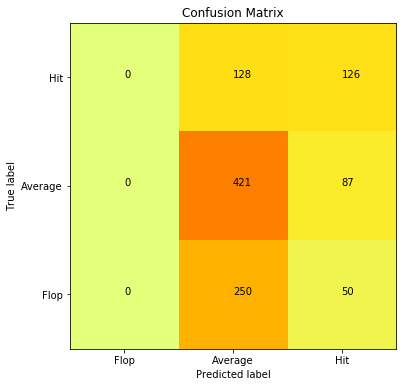

Normalized confusion matrix


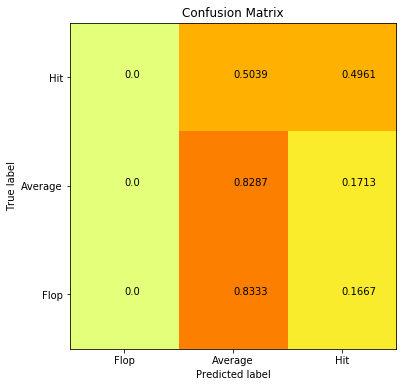

MODEL Third Model 
Accuracy Score: 0.5151 
Loss: 1.0558

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

        Flop       0.00      0.00      0.00       300
     Average       0.53      0.83      0.64       508
         Hit       0.48      0.50      0.49       254

    accuracy                           0.52      1062
   macro avg       0.34      0.44      0.38      1062
weighted avg       0.37      0.52      0.42      1062



In [64]:
results_summary(model3_regularize, "Third Model", X_test, y_test)

Regularizer appear to have broken the model, will change to binary for GloVe models

# Model 2: Pre-Trained Embeddings Model

In [30]:
# Attempting with pre-trained embeddings

# load the glove6B embedding
# This is a set of pre-trained word vectors that contained 840 billion tokens, and 2.2M vocab words.

embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding='utf8')

for line in f:
    # Note: use split(' ') instead of split() if you get an error
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


In [31]:
# Need to create a weight matrix for our pre-trained embedding layer

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 50))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**For whatever reason, trying to run a multiclassification problem with pre-trained embeddings caused me severe computer issues. As such, my solution was to change this problem to a binary classification problem and see what sort of results I could get using pre-trained embeddings.**

In [32]:
# Changing to binary classification problem. For whatever reason my computer couldn't handle embedding for multiclass.
# Train and test with test size at 10%

NLP_model_df.loc[(NLP_model_df['BINARY_Hits'] == 1) | (NLP_model_df['BINARY_Hits'] ==0), 'BINARY_GLOVE'] = 0
NLP_model_df.loc[NLP_model_df['BINARY_Hits'] == 2, 'BINARY_GLOVE'] = 1

In [33]:
NLP_model_df['BINARY_GLOVE'].value_counts()

0.0    8037
1.0    2582
Name: BINARY_GLOVE, dtype: int64

In [34]:
y_binary_glove = to_categorical(NLP_model_df['BINARY_GLOVE'])

In [35]:
# Resetting train and test for binary
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_glove, test_size=0.1, random_state=42) 

In [36]:
glove_model1 = Sequential()

glove_model1.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False))

glove_model1.add(Bidirectional(GRU(30, return_sequences=True)))
glove_model1.add(GlobalMaxPool1D())
glove_model1.add(Dense(70, kernel_regularizer=regularizers.l2(0.01), activation='relu'))  
glove_model1.add(Dropout(0.3))
glove_model1.add(Dense(2, activation='softmax'))

In [37]:
glove_model1.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [38]:
glove_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 50)           3898800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 60)           14580     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 70)                4270      
_________________________________________________________________
dropout_3 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 142       
Total params: 3,917,792
Trainable params: 18,992
Non-trainable params: 3,898,800
_____________________________________________________________

In [39]:
glove_model1_hist = glove_model1.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1, verbose=2)

Train on 8601 samples, validate on 956 samples
Epoch 1/8
 - 12s - loss: 0.6145 - acc: 0.7532 - val_loss: 0.5738 - val_acc: 0.7709
Epoch 2/8
 - 11s - loss: 0.5434 - acc: 0.7548 - val_loss: 0.5130 - val_acc: 0.7709
Epoch 3/8
 - 11s - loss: 0.5299 - acc: 0.7548 - val_loss: 0.5252 - val_acc: 0.7709
Epoch 4/8
 - 11s - loss: 0.5178 - acc: 0.7548 - val_loss: 0.5268 - val_acc: 0.7709
Epoch 5/8
 - 11s - loss: 0.5110 - acc: 0.7629 - val_loss: 0.5499 - val_acc: 0.7688
Epoch 6/8
 - 11s - loss: 0.5028 - acc: 0.7756 - val_loss: 0.4941 - val_acc: 0.7845
Epoch 7/8
 - 11s - loss: 0.4830 - acc: 0.7927 - val_loss: 0.5330 - val_acc: 0.7741
Epoch 8/8
 - 11s - loss: 0.4743 - acc: 0.7957 - val_loss: 0.4993 - val_acc: 0.7762


1062/1062 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 361us/step
Confusion matrix, without normalization


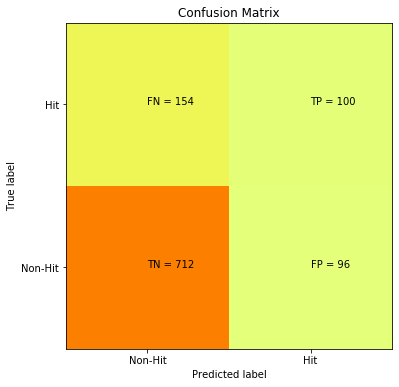

Normalized confusion matrix


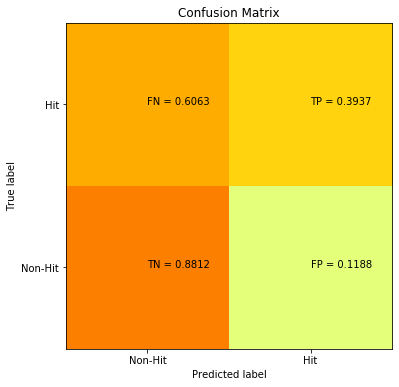

MODEL Glove Model 
Accuracy Score: 0.7646 
Loss: 0.5149

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

     Non-Hit       0.82      0.88      0.85       808
         Hit       0.51      0.39      0.44       254

    accuracy                           0.76      1062
   macro avg       0.67      0.64      0.65      1062
weighted avg       0.75      0.76      0.75      1062



In [40]:
results_summary_binary(glove_model1, "Glove Model", X_test, y_test)

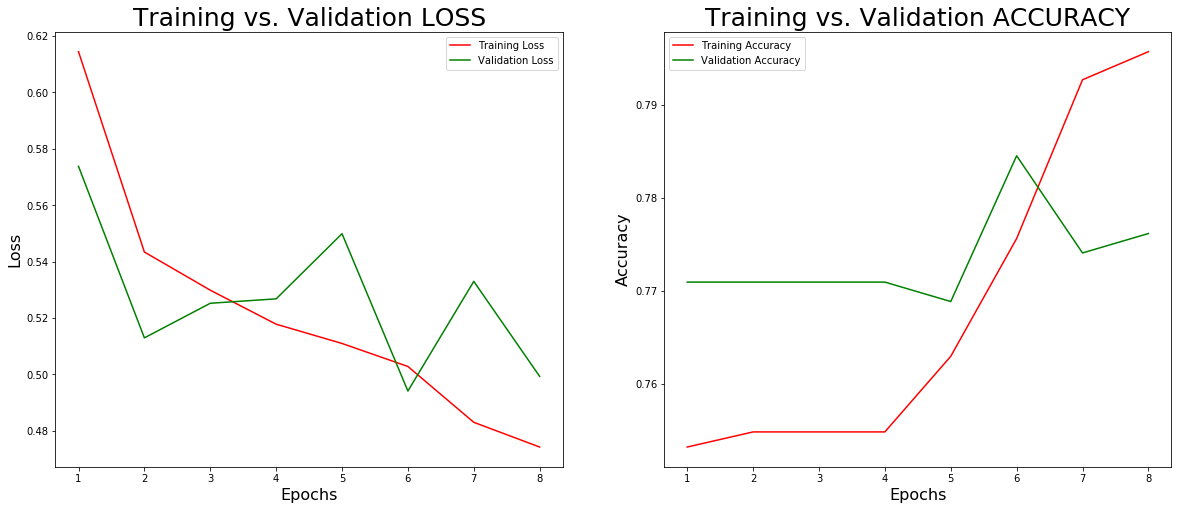

In [41]:
deep_learning_visuals(glove_model1_hist)

## Solid results, but perhaps the low f-1 scores for hits are being driven by the imbalanced dataset. Below I use SMOTE to even them out and try a new Glove model

In [42]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

In [43]:
y_train_resampled = to_categorical(y_train_resampled)

In [44]:
glove_model2 = Sequential()

glove_model2.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False))
glove_model2.add(Bidirectional(GRU(30, return_sequences=True)))
glove_model2.add(GlobalMaxPool1D())
glove_model2.add(Dropout(0.5))
glove_model2.add(Dense(70, kernel_regularizer=regularizers.l2(0.01), activation='relu'))  
glove_model2.add(Dropout(0.3))
glove_model2.add(Dense(2, activation='softmax'))

In [45]:
glove_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
glove_model2_hist = glove_model2.fit(X_train_resampled, y_train_resampled, epochs=8, batch_size=32, validation_split=0.1, verbose=2)

Train on 13012 samples, validate on 1446 samples
Epoch 1/8
 - 18s - loss: 0.9589 - acc: 0.5468 - val_loss: 0.8132 - val_acc: 0.3728
Epoch 2/8
 - 17s - loss: 0.6751 - acc: 0.6532 - val_loss: 0.4994 - val_acc: 0.8714
Epoch 3/8
 - 17s - loss: 0.5822 - acc: 0.7242 - val_loss: 0.3034 - val_acc: 0.9350
Epoch 4/8
 - 17s - loss: 0.5270 - acc: 0.7625 - val_loss: 0.1969 - val_acc: 0.9550
Epoch 5/8
 - 17s - loss: 0.4948 - acc: 0.7851 - val_loss: 0.1833 - val_acc: 0.9488
Epoch 6/8
 - 17s - loss: 0.4698 - acc: 0.7947 - val_loss: 0.1459 - val_acc: 0.9557
Epoch 7/8
 - 17s - loss: 0.4674 - acc: 0.7946 - val_loss: 0.1090 - val_acc: 0.9730
Epoch 8/8
 - 17s - loss: 0.4414 - acc: 0.8108 - val_loss: 0.1433 - val_acc: 0.9530


1062/1062 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 345us/step
Confusion matrix, without normalization


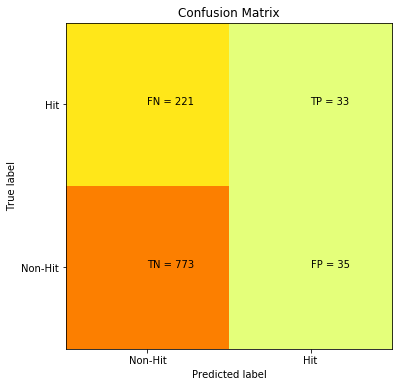

Normalized confusion matrix


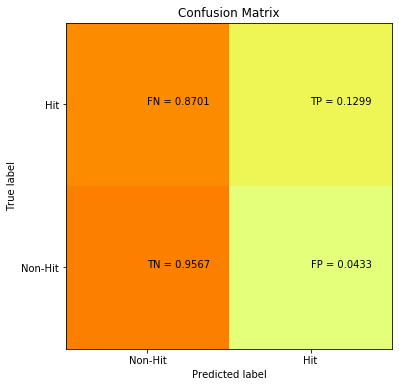

MODEL Glove Model 
Accuracy Score: 0.7589 
Loss: 0.5212

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

     Non-Hit       0.78      0.96      0.86       808
         Hit       0.49      0.13      0.20       254

    accuracy                           0.76      1062
   macro avg       0.63      0.54      0.53      1062
weighted avg       0.71      0.76      0.70      1062



In [47]:
results_summary_binary(glove_model2, "Glove Model", X_test, y_test)

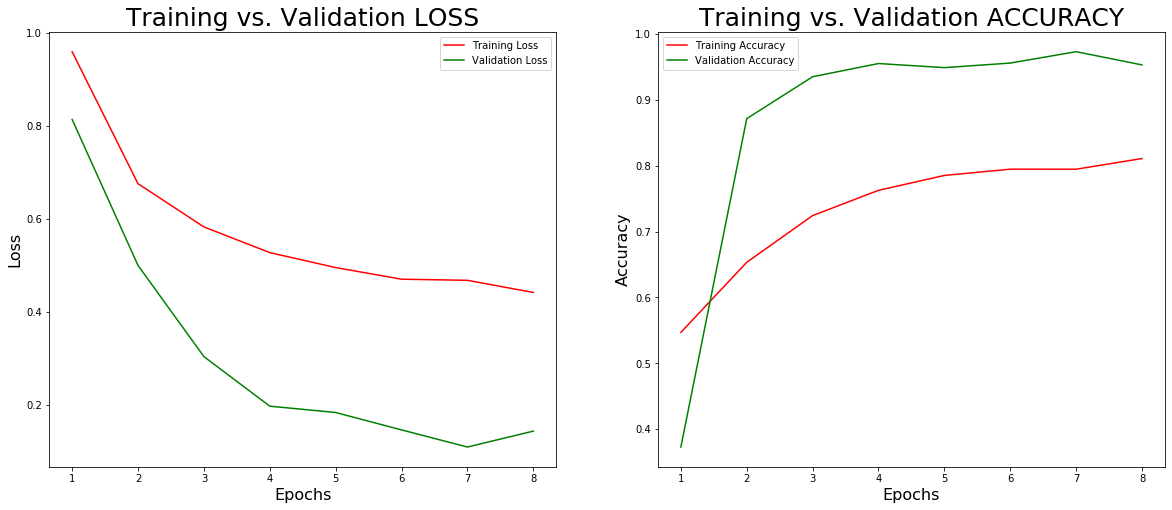

In [48]:
deep_learning_visuals(glove_model2_hist)

# NLP Steam Modeling Conclusions

- Unsurprisingly, the pre-trained GloVe model performed much better than the self-embedding model. Ultimately, the validation and training accuracy/loss charts from the first Glove model indicate it is the strongest. 

- The final model's layout included
    - Bidirectional GRU
    - 1 dropout layers
    - Pooling layer
    - 2 dense layers
    - L2 regularization

- This was a frustrating exercise, as I found that most of my models struggled to predict whether or not a game will be a success based solely on its about text.
- Supported by EDA, I believe this is because many games (at least within the same genre) contain similar words and phrases. More often that not, it is not the description of a game that will cause someone to buy the game
- Instead of building an entire model to predict steam success (because success in this dataframe is difficult to determine), I will focus on building a model off of the combined vgchartz and steam dataframes.